<center><h1 style="background-image:linear-gradient(to right,#FF0000,#FFA500,#FFFF00,#008000,#0000FF,#4B0082,#800080);padding:5px;border-radius:5px;font-family:'creepster';font-size:300%;color:white;">HARRY POTTER </h1></center>

<center><img src="harry.jpg" style="border: 5px solid black; width:400px;height:600px;" /></center>
<p style="font-size:24px;">In this project we deep dive into magical world of harry potter. It describes how emotions changes throught the chapters.emotions of different theme based situation. and exitedness of charectors such as harry,snape etc.here we go through thrilling magic and emotion drift between chapters and mindblowing visualization.</p>
<h3 style="color:skyblue">WELCOME TO MAGIC WORLD </h3>


<center><h3 style="background-image:linear-gradient(to right,#FF0000,#FFA500,#FFFF00,#008000,#0000FF,#4B0082,#800080);padding:5px;border-radius:5px;font-family:'creepster';color:white;">IMPORTING LIBRARIES </h1></center>

In [1]:
import nltk
import numpy
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import re
from matplotlib import colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<center><h3 style="background-image:linear-gradient(to right,#FF0000,#FFA500,#FFFF00,#008000,#0000FF,#4B0082,#800080);padding:5px;border-radius:5px;font-family:'creepster';color:white;">LOADING DATA</h1></center>

In [3]:
with open("J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt",'r') as file:
     text=file.read()
pattern=r'(?:CHAPTER )'#split before each chapter label
chapters=re.split(pattern,text)[1:]
df=pd.DataFrame( { "chapter":range(1,len(chapters)+1),
                  "content":[chapter.strip() for chapter in chapters]
                                   }              )


In [4]:
df.head(17)

,chapter,content
0,1,"THE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of ..."
1,2,THE VANISHING GLASS\n\nNearly ten years had pa...
2,3,THE LETTERS FROM NO ONE\n\nThe escape of the B...
3,4,THE KEEPER OF THE KEYS\n\nBOOM. They knocked a...
4,5,DIAGON ALLEY\n\nHarry woke early the next morn...
5,6,THE JOURNEY FROM PLATFORM NINE AND THREE-QUART...
6,7,THE SORTING HAT\n\nThe door swung open at once...
7,8,"THE POTIONS MASTER\n\nThere, look.""\n\n""Where?..."
8,9,THE MIDNIGHT DUEL\n\nHarry had never believed ...
9,10,HALLOWEEN\n\nMalfoy couldn't believe his eyes ...


In [5]:
len(df)

17

here  novel contains 17 chapter.

<center><h3 style="background-image:linear-gradient(to right,#FF0000,#FFA500,#FFFF00,#008000,#0000FF,#4B0082,#800080);padding:5px;border-radius:5px;font-family:'creepster';color:white;">DATA PREPROCESSING</h1></center>

In [6]:
nlp=spacy.load('en_core_web_sm')
def preprocess(text):
    # remove stop words and lemmatize the text
    text = text.replace('\n\n', ' ')
    text = text.replace('\n', ' ')
    doc = nlp(text.lower())
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)
df['preprosessed_text']=df['content'].apply(lambda x:preprocess(x))

In [7]:
df.head()

,chapter,content,preprosessed_text
0,1,"THE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of ...",boy live mr mrs dursley number privet drive pr...
1,2,THE VANISHING GLASS\n\nNearly ten years had pa...,vanish glass nearly year pass dursley wake fin...
2,3,THE LETTERS FROM NO ONE\n\nThe escape of the B...,letter escape brazilian boa constrictor earn h...
3,4,THE KEEPER OF THE KEYS\n\nBOOM. They knocked a...,keeper key boom knock dudley jerk awake cannon...
4,5,DIAGON ALLEY\n\nHarry woke early the next morn...,diagon alley harry wake early morning tell day...


In [8]:
df['preprosessed_text'].nunique()

17

**EDA**


In [9]:
# Combine all preprocessed text into one long string
all_text = " ".join(df['preprosessed_text'])

tokens = all_text.split()
# Extract just the lemma (before the slash)
lemmas = [token for token in tokens]

# Get unique lemmas
unique_lemmas = set(lemmas)

from collections import Counter
lemma_counts = Counter(lemmas)
print("top 10 most used words:   ",lemma_counts.most_common(10))

top 10 most used words:    [('harry', 1325), ('say', 850), ('ron', 429), ('look', 412), ('hagrid', 370), ('know', 317), ('go', 272), ('hermione', 269), ('get', 263), ('think', 227)]


here we can clearly see the maincharacters name repeat offently in novel.

In [10]:
print("number of words in story",len(tokens))

number of words in story 35235


In [11]:
# Finding the frequency of each unique words
count_dict = Counter(lemmas)

print("Number of unique words in the book after preprosessing -",len(count_dict.keys()))

Number of unique words in the book after preprosessing - 4198


In [12]:
# Converting to dataframe for analysis
bow_df = pd.DataFrame(count_dict.items()).rename(columns={0:'word',1:'count'})
bow_df.head()

,word,count
0,boy,101
1,live,26
2,mr,81
3,mrs,46
4,dursley,106


<center><h1 style="background-image:linear-gradient(to right,#FF0000,#FFA500,#FFFF00,#008000,#0000FF,#4B0082,#800080);padding:5px;border-radius:5px;font-family:'creepster';font-size:300%;color:white;">Sentiment Analysis </h1></center>

In [13]:
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()
df['chapter_sentiment']=df['preprosessed_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
df.head()

,chapter,content,preprosessed_text,chapter_sentiment
0,1,"THE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of ...",boy live mr mrs dursley number privet drive pr...,0.9990
1,2,THE VANISHING GLASS\n\nNearly ten years had pa...,vanish glass nearly year pass dursley wake fin...,-0.9360
2,3,THE LETTERS FROM NO ONE\n\nThe escape of the B...,letter escape brazilian boa constrictor earn h...,0.9517
3,4,THE KEEPER OF THE KEYS\n\nBOOM. They knocked a...,keeper key boom knock dudley jerk awake cannon...,-0.9959
4,5,DIAGON ALLEY\n\nHarry woke early the next morn...,diagon alley harry wake early morning tell day...,0.9997


In [15]:

from textblob import TextBlob

df['Chapter_sentiment_textblob'] = df['preprosessed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
df.head()

,chapter,content,preprosessed_text,chapter_sentiment,Chapter_sentiment_textblob
0,1,"THE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of ...",boy live mr mrs dursley number privet drive pr...,0.9990,0.058579
1,2,THE VANISHING GLASS\n\nNearly ten years had pa...,vanish glass nearly year pass dursley wake fin...,-0.9360,0.011322
2,3,THE LETTERS FROM NO ONE\n\nThe escape of the B...,letter escape brazilian boa constrictor earn h...,0.9517,-0.023640
3,4,THE KEEPER OF THE KEYS\n\nBOOM. They knocked a...,keeper key boom knock dudley jerk awake cannon...,-0.9959,0.032219
4,5,DIAGON ALLEY\n\nHarry woke early the next morn...,diagon alley harry wake early morning tell day...,0.9997,0.086250


In [17]:
df['chapter_sentiment'].values

array([ 0.999 , -0.936 ,  0.9517, -0.9959,  0.9997,  0.9994,  0.9994,
        0.9929,  0.9427,  0.9986,  0.9949,  0.9993,  0.998 ,  0.9984,
       -0.9997,  0.9979,  0.9984])

In [18]:
df['Chapter_sentiment_textblob'].values

array([ 0.05857911,  0.01132196, -0.02364015,  0.03221935,  0.08624967,
        0.0527655 ,  0.05763542, -0.01284054,  0.07994667,  0.06102651,
        0.05818553,  0.06641284,  0.06545546,  0.06101957,  0.00171204,
        0.0378003 ,  0.06774191])

vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(df['preprosessed_text'].values)

In [20]:
Y=df["chapter_sentiment"]
def sentiment_label(score):
    if score < -0.3:
        return 0#sad
    elif score <= 0.3:
        return 1#nutral
    else:
        return 2#happy

# Apply mapping
y_labels = numpy.array([sentiment_label(score) for score in Y])


In [21]:
df["sentiment_label"]=y_labels

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y_labels,test_size=0.2,random_state=42)

## Naive Bayes

In [23]:
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

[[0 1]
 [0 3]]
0.75


## LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
cl=LogisticRegression()
cl.fit(x_train,y_train)
y_pred=cl.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

[[0 1]
 [0 3]]
0.75


<center><h3 style="background-image:linear-gradient(to right,#FF0000,#FFA500,#FFFF00,#008000,#0000FF,#4B0082,#800080);padding:5px;border-radius:5px;font-family:'creepster';color:white;">charecter specific sentiment analysis</h3></center>

In [25]:
text=" ".join(df['content'])

In [26]:
main_characters = ['Harry', 'Ron', 'Hermione', 'Hagrid', 'Dumbledore', 'Snape', 'Voldemort']


In [27]:
pattern = r'"(.*?)"\s*(?:,?\s*(?:said|asked|replied|cried|shouted)\s+([A-Z][a-z]+))'
matches = re.findall(pattern, text)
records=[]
for _, row in df.iterrows():
    chap = row['chapter']  # numeric or string
    text = row['content']  # or 'preprocessed_text' if you want that variant

    for quote, speaker in re.findall(pattern, text):
        if speaker in main_characters:
            score = sia.polarity_scores(quote)['compound']
            records.append({
                'chapter': chap,
                'character': speaker,
                'quote': quote,
                'sentiment_score': score
            })

char_df = pd.DataFrame(records)

In [87]:
char_df.head()

,chapter,character,quote,sentiment_score
0,1,Dumbledore,"You can't blame them,",0.2584
1,1,Dumbledore,"It certainly seems so,",0.3400
2,1,Dumbledore,"You flatter me,",0.1027
3,1,Dumbledore,"We can only guess,",0.0000
4,1,Dumbledore,"It's the best place for him,",0.6369


In [29]:
char_df.groupby('character')['sentiment_score'].agg(['mean'])#main characters sentiment in novel

,mean
character,
Dumbledore,0.217796
Hagrid,0.035640
Harry,0.035555
Hermione,-0.000229
Ron,0.035481
Snape,-0.106967


<center><h3 style="background-image:linear-gradient(to right,#FF0000,#FFA500,#FFFF00,#008000,#0000FF,#4B0082,#800080);padding:5px;border-radius:5px;font-family:'creepster';color:white;">Theme specific sentiment analysis</h3></center>

In [48]:
themes={
    "freindship":["friend","mate","buddy"],
    "magic":["dragon","wizard","wingardium leviosa","nox"],
    "familybond":["love","family","friendship"],
    "darkness":["betrayal","death","evil","fear"]
}

In [49]:
from nltk.tokenize import sent_tokenize
sentences=sent_tokenize(text)

In [50]:
theme_sentence={} 
for theme,key in themes.items():
    theme_sentence[theme]=[sentence for sentence in sentences if any(keyword in sentence.lower() for keyword in key)]


In [51]:
# Merge each list into a single string
merged_data = {key: ' '.join(value) for key, value in theme_sentence.items()}

# Convert to DataFrame
theme = pd.DataFrame(list(merged_data.items()), columns=['theme', 'text'])

theme.head()

,theme,text
0,freindship,Your friend Miss Granger accidentally\nknocked...
1,magic,"""Sometimes,"" he said, ""I find it hard to follo..."
2,familybond,If there is one thing Voldemort cannot\nunders...
3,darkness,"Unfortunately, while\neveryone else was runnin..."


In [52]:
theme['preprosessed_text']=theme['text'].apply(lambda x:preprocess(x))

In [53]:
theme['theme_sentiment']=theme['preprosessed_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [54]:
theme.head()

,theme,text,preprosessed_text,theme_sentiment
0,freindship,Your friend Miss Granger accidentally\nknocked...,friend miss granger accidentally knock rush se...,0.9756
1,magic,"""Sometimes,"" he said, ""I find it hard to follo...",say find hard follow master instruction great ...,0.8074
2,familybond,If there is one thing Voldemort cannot\nunders...,thing voldemort understand love realize love p...,0.9657
3,darkness,"Unfortunately, while\neveryone else was runnin...",unfortunately run look snape suspect go straig...,-0.9761


<center><h3 style="background-image:linear-gradient(to right,#FF0000,#FFA500,#FFFF00,#008000,#0000FF,#4B0082,#800080);padding:5px;border-radius:5px;font-family:'creepster';color:white;">DATA VISUALIZATION</h3></center>

In [55]:
sns.set(rc={'axes.facecolor':'black'})

Text(0.5, 1.0, 'Appearance of Key characters')

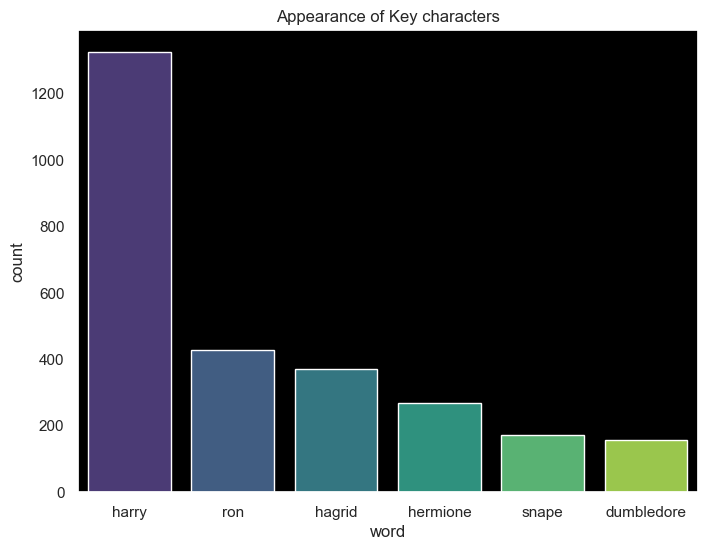

In [56]:
# Appearance of key characters in the book
key_char = ['harry','ron','hermione','dumbledore','snape','hagrid']
d = bow_df[bow_df['word'].isin(key_char)].sort_values(by='count',ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x = d['word'],y = d['count'],palette='viridis')
plt.grid(False)
plt.title("Appearance of Key characters")

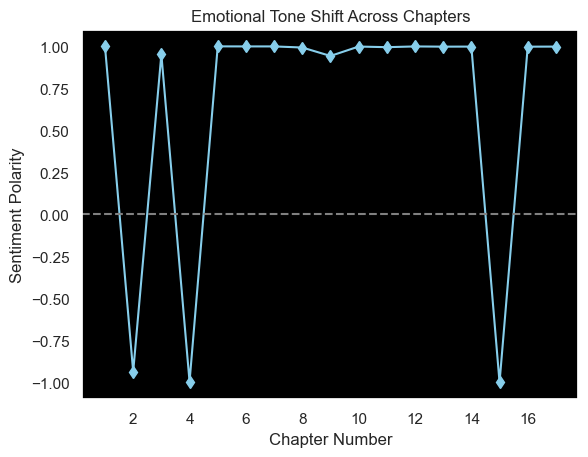

In [57]:
plt.plot(df['chapter'],df['chapter_sentiment'],c='skyblue',marker='d')
plt.grid(False)
plt.title('Emotional Tone Shift Across Chapters')
plt.xlabel('Chapter Number')
plt.ylabel('Sentiment Polarity')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

**Low Sentiment Chapters (Chapters 2, 4, and 15)**:
These chapters capture darker or tense moments.
Chapter 2 shows Harry’s continued mistreatment by the Dursleys.
Chapter 4 introduces Hagrid’s shocking revelations about Harry’s past, bringing both fear and confusion.
Chapter 15 plunges into the Forbidden Forest a scene filled with dread, the death of a unicorn, and a direct brush with dark magic. These events naturally drag the sentiment score into negative territory.

**High Sentiment Chapters (e.g., Chapters 5, 7, 9):**
Positive sentiment spikes in chapters filled with wonder and joy  Harry’s first visit to Diagon Alley, his arrival at Hogwarts, making friends, and the thrill of his first Quidditch match. These moments celebrate magic, friendship, and adventure.

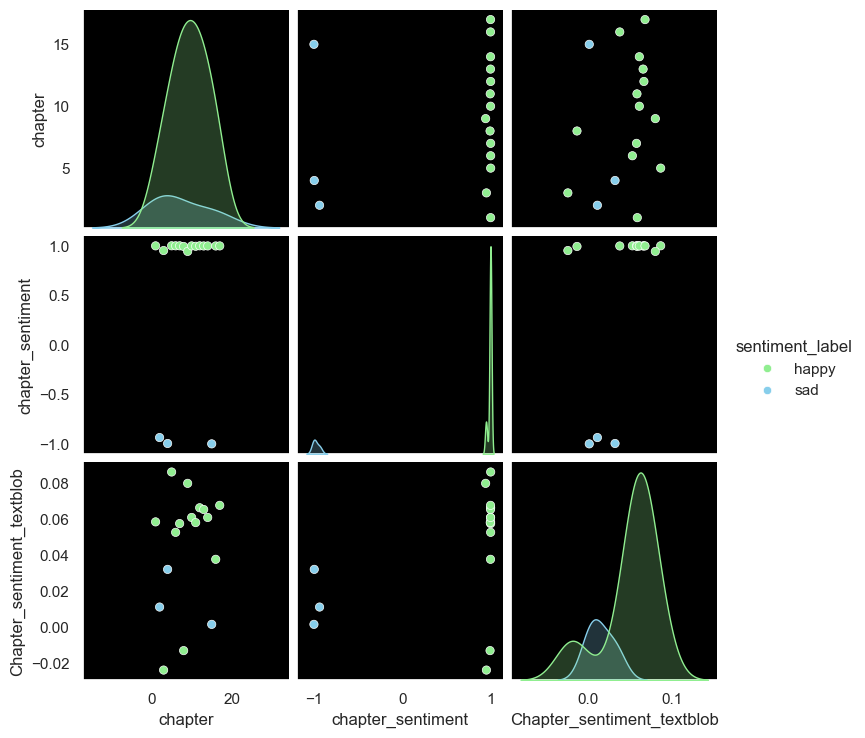

In [58]:
df['sentiment_label'] = df['sentiment_label'].replace({
    0: 'sad',
    1: 'Nutrel',
    2:'happy'
})

g=sns.pairplot(df,hue='sentiment_label',palette=['lightgreen','skyblue','white'])

for ax in g.axes.flatten():
    ax.grid(False)
plt.show()

In [59]:
pos_chapter =  df[df['sentiment_label'] == 'happy']

In [60]:
pos_chapter.head()

,chapter,content,preprosessed_text,chapter_sentiment,Chapter_sentiment_textblob,sentiment_label
0,1,"THE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of ...",boy live mr mrs dursley number privet drive pr...,0.9990,0.058579,happy
2,3,THE LETTERS FROM NO ONE\n\nThe escape of the B...,letter escape brazilian boa constrictor earn h...,0.9517,-0.023640,happy
4,5,DIAGON ALLEY\n\nHarry woke early the next morn...,diagon alley harry wake early morning tell day...,0.9997,0.086250,happy
5,6,THE JOURNEY FROM PLATFORM NINE AND THREE-QUART...,journey platform quarter harry month dursley f...,0.9994,0.052766,happy
6,7,THE SORTING HAT\n\nThe door swung open at once...,sort hat door swing open tall black haired wit...,0.9994,0.057635,happy


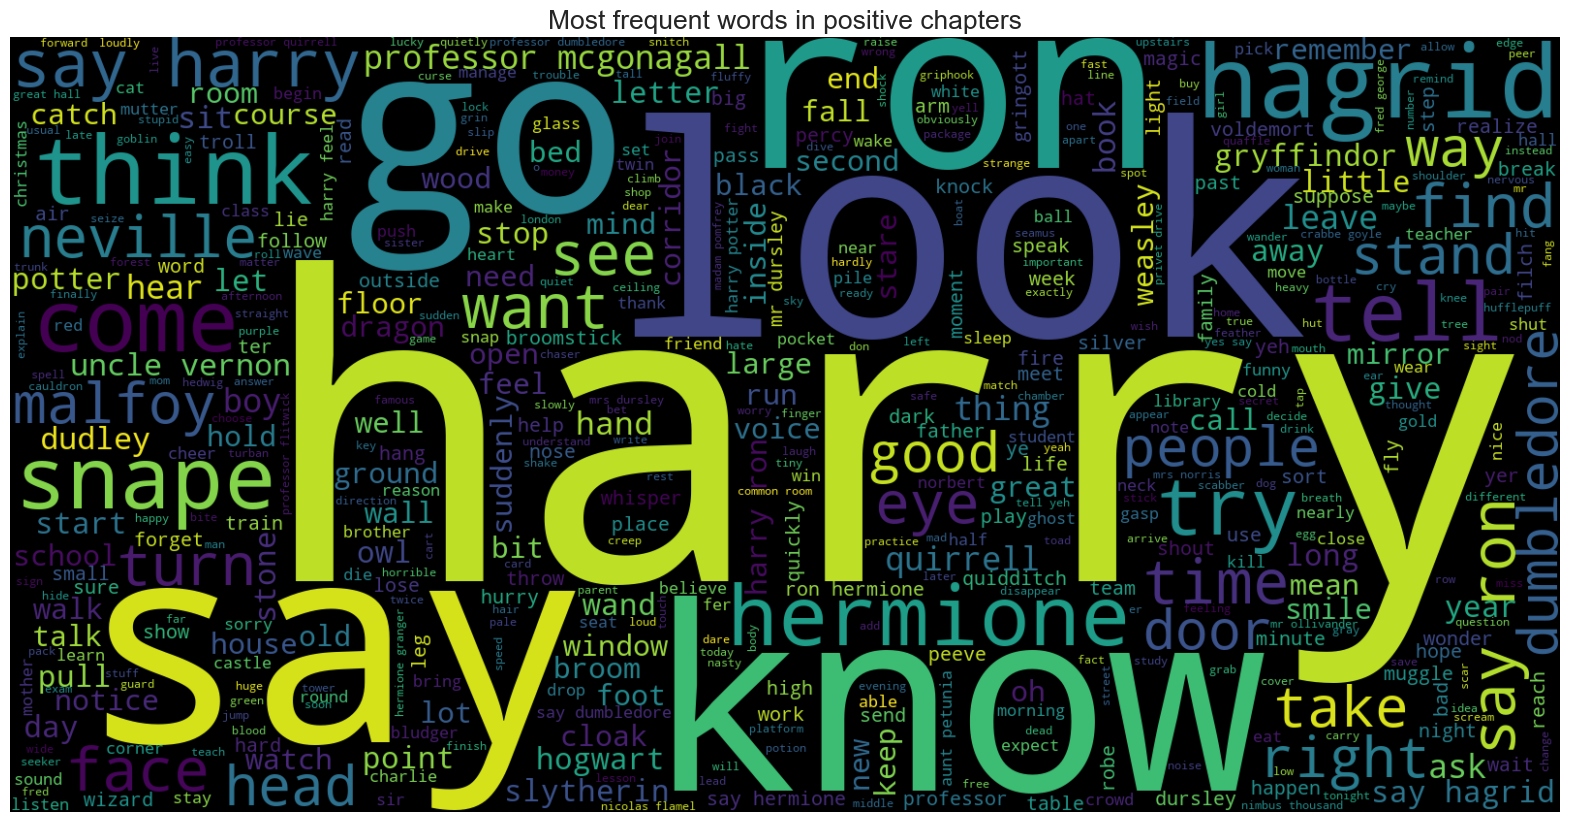

In [61]:
text = ' '.join(pos_chapter['preprosessed_text'])
from wordcloud import WordCloud
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive chapters', fontsize = 19)
plt.show()

In [62]:
count = Counter()
for text in pos_chapter['preprosessed_text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('harry', 1105),
 ('say', 720),
 ('ron', 417),
 ('look', 346),
 ('hagrid', 284),
 ('know', 257),
 ('hermione', 242),
 ('go', 226),
 ('get', 223),
 ('think', 190),
 ('professor', 170),
 ('like', 163),
 ('snape', 163),
 ('come', 161),
 ('tell', 156)]

In [63]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,harry,1105
1,say,720
2,ron,417
3,look,346
4,hagrid,284


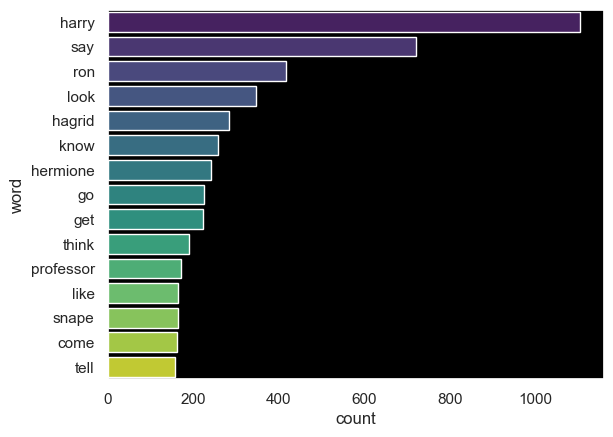

In [64]:
sns.barplot(pos_words, x='count', y='word', palette = 'viridis')
plt.grid(False)

In [65]:
neg_chapter =  df[df['sentiment_label'] == 'sad']

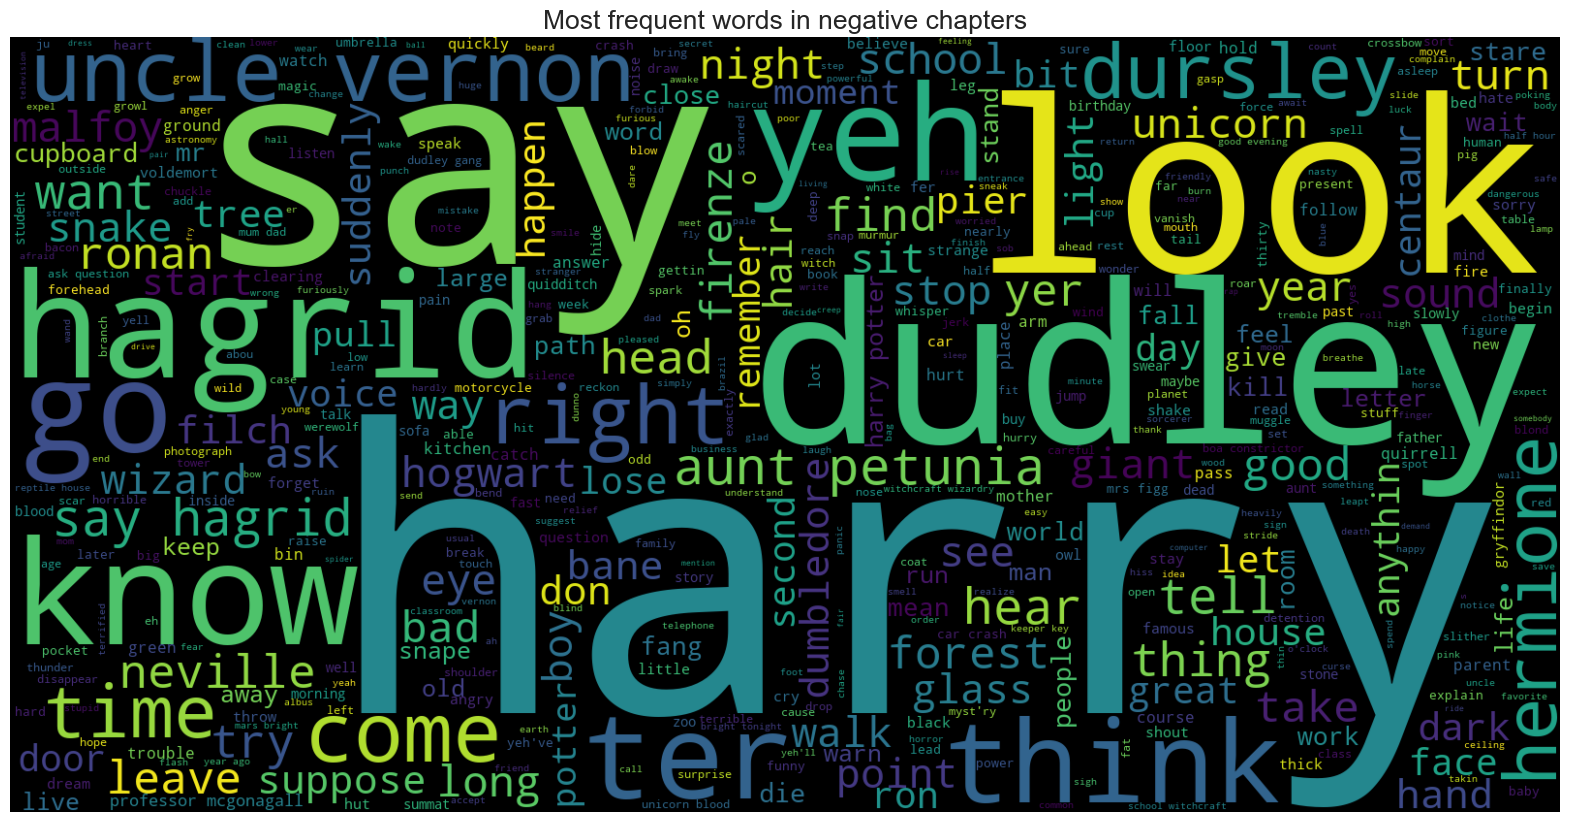

In [66]:
text = ' '.join(neg_chapter['preprosessed_text'])
from wordcloud import WordCloud
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative chapters', fontsize = 19)
plt.show()

In [67]:
count = Counter()
for text in neg_chapter['preprosessed_text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('harry', 220),
 ('say', 130),
 ('hagrid', 86),
 ('dudley', 67),
 ('look', 66),
 ('know', 60),
 ('yeh', 50),
 ('like', 48),
 ('go', 46),
 ('get', 40),
 ('uncle', 40),
 ('vernon', 40),
 ('ter', 40),
 ('think', 37),
 ('come', 35)]

In [68]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,harry,220
1,say,130
2,hagrid,86
3,dudley,67
4,look,66


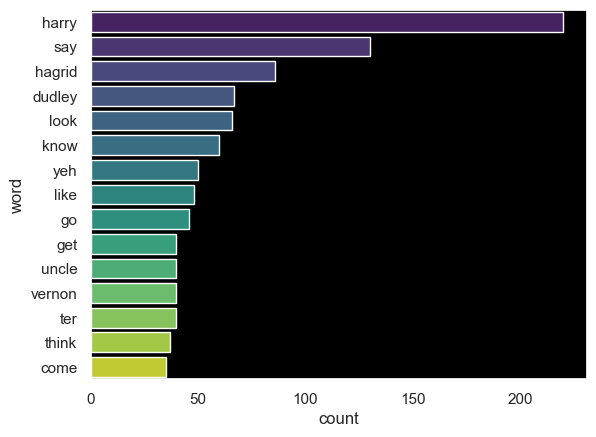

In [69]:
sns.barplot(neg_words, x='count', y='word', palette = 'viridis')
plt.grid(False)

In [70]:
res = pd.concat([
    df[[ 'chapter_sentiment']].reset_index(drop=True),
    pd.get_dummies(df['sentiment_label']).reset_index(drop=True)
], axis=1)

In [71]:
res['happy']=res['happy'].replace({True:1,False:0})
res['sad']=res['sad'].replace({True:1,False:0})

<Axes: >

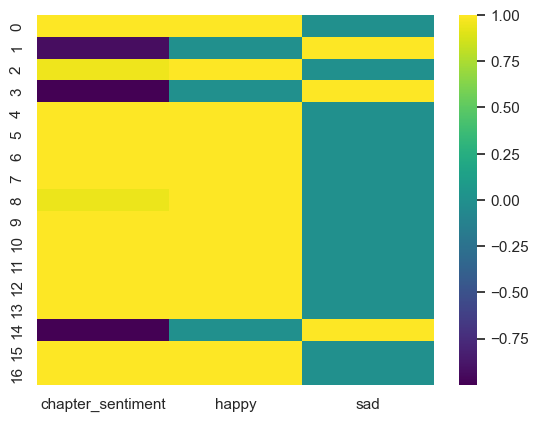

In [72]:
corrmap=res.corr()
sns.heatmap(res,cmap='viridis')

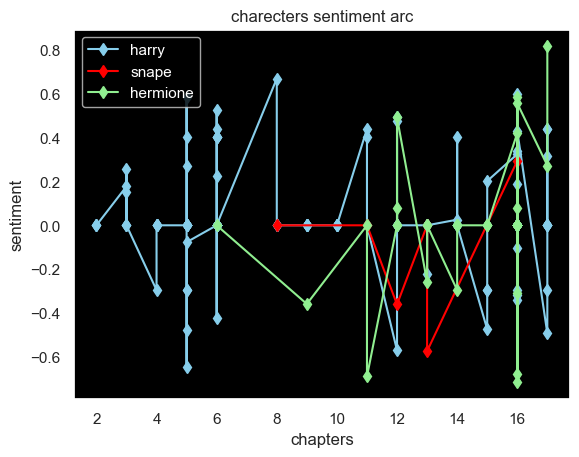

In [73]:
plt.plot(char_df[char_df["character"]=='Harry']['chapter'],char_df[char_df["character"]=='Harry']['sentiment_score'] ,marker='d',color='skyblue',label='harry')
plt.plot(char_df[char_df["character"]=='Snape']['chapter'],char_df[char_df["character"]=='Snape']['sentiment_score'] ,marker='d',color='red',label='snape')
plt.plot(char_df[char_df["character"]=='Hermione']['chapter'],char_df[char_df["character"]=='Hermione']['sentiment_score'] ,marker='d',color='lightgreen',label='hermione')
plt.title("charecters sentiment arc")
plt.xlabel("chapters")
plt.ylabel("sentiment")
g=plt.legend()
for text in g.get_texts():
            text.set_color("white")
plt.grid(False)

It shows how charecters emotions drift across chapters.here we can see ovrall chapters sentiment is has corrolation with main charecter "harry's" sentiment.snape and hermione have low sentiment.even though hermione is good charector the dilogue have negative sentiment few times due to usage of wordings like jerk,Oh, shut up,	Not if I can help it, etc

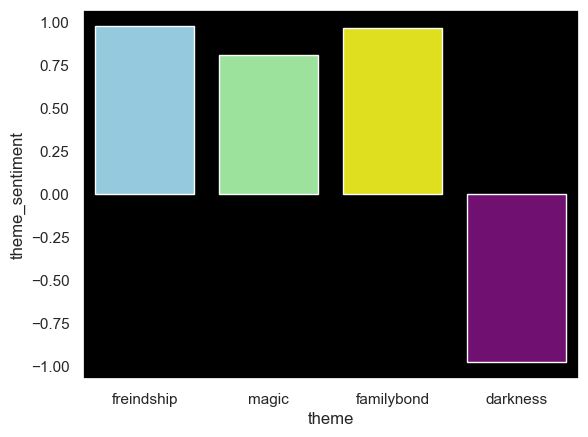

In [76]:
sns.barplot(theme,x='theme',y='theme_sentiment',palette=['skyblue','lightgreen','yellow','purple'])
plt.grid(False)

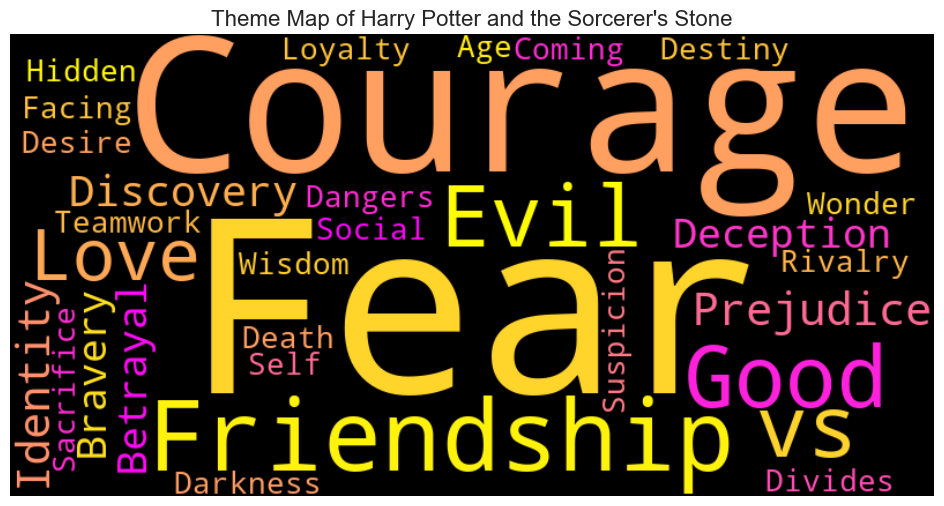

In [81]:

chapter_themes = {
    1: ['Love', 'Destiny', 'Hidden Dangers'],
    2: ['Fear', 'Prejudice', 'Identity'],
    3: ['Identity', 'Courage'],
    4: ['Discovery', 'Coming of Age'],
    5: ['Friendship', 'Wonder', 'Social Divides'],
    6: ['Friendship', 'Prejudice', 'Loyalty'],
    7: ['Courage', 'Self-Discovery', 'Deception'],
    8: ['Good vs Evil', 'Fear', 'Friendship'],
    9: ['Bravery', 'Rivalry'],
    10: ['Friendship', 'Fear', 'Deception'],
    11: ['Courage', 'Teamwork'],
    12: ['Desire', 'Wisdom'],
    13: ['Suspicion', 'Good vs Evil'],
    14: ['Courage', 'Facing Fear'],
    15: ['Betrayal', 'Death', 'Darkness'],
    16: ['Bravery', 'Sacrifice'],
    17: ['Good vs Evil', 'Love', 'Betrayal']
}

# Flatten themes into a single text for word cloud
all_themes = []
for themes in chapter_themes.values():
    all_themes.extend(themes)

theme_text = ' '.join(all_themes)

# Create the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='spring').generate(theme_text)

# Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Theme Map of Harry Potter and the Sorcerer\'s Stone', fontsize=16)
plt.show()


The Word Cloud  highlights key themes across the chapters.  
Themes like **Friendship**, **Courage**, and **Good vs Evil** emerge as dominant, reflecting both narrative focus and emotional intensity in the story.


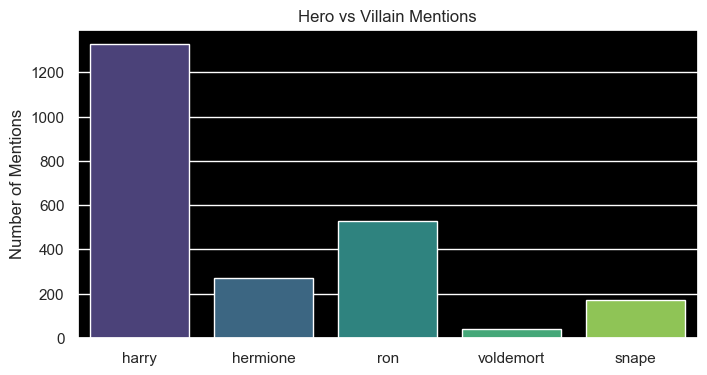

In [77]:
heroes = ['harry', 'hermione', 'ron']
villains = ['voldemort', 'snape']

hero_mentions = {char: df['preprosessed_text'].str.count(char).sum() for char in heroes}
villain_mentions = {char: df['preprosessed_text'].str.count(char).sum() for char in villains}

# Combine and Plot
all_mentions = {**hero_mentions, **villain_mentions}

plt.figure(figsize=(8, 4))
sns.barplot(x=list(all_mentions.keys()), y=list(all_mentions.values()),palette='viridis')
plt.title('Hero vs Villain Mentions')
plt.ylabel('Number of Mentions')
plt.show()


<center><h1 style="background-image:linear-gradient(to right,#FF0000,#FFA500,#FFFF00,#008000,#0000FF,#4B0082,#800080);padding:5px;border-radius:5px;font-family:'creepster';font-size:300%;color:white;">END </h1></center>

<center><img src="thank.jpg" style="border: 5px solid black; width:1000px;height:500px;" /></center>